In [1]:
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

# Read Data

In [2]:
data=pd.read_csv("/kaggle/input/mtcars/mtcars.csv")

In [3]:
data.head(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
data.tail(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [5]:
data.shape

(32, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [7]:
data.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [8]:
correlation_matrix=data.corr()

In [9]:
correlation_matrix.style.background_gradient(cmap='coolwarm')

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


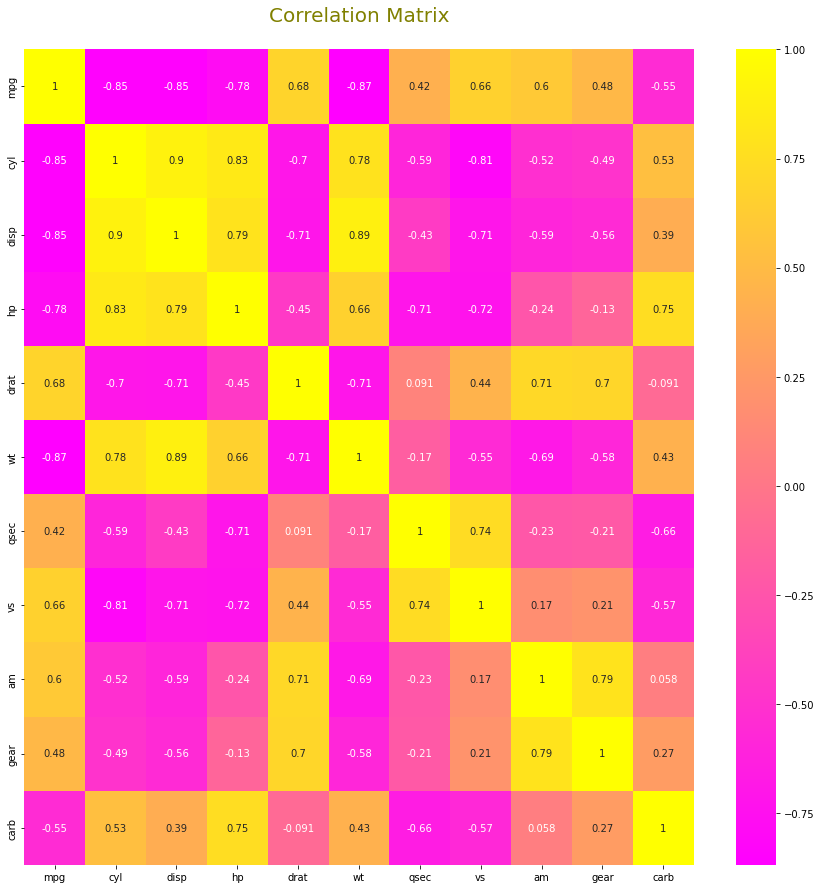

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), cmap="spring", annot=True)
plt.title("Correlation Matrix\n",fontsize=20,color="olive")
plt.show()

# Scatter Plot HP VS MPG

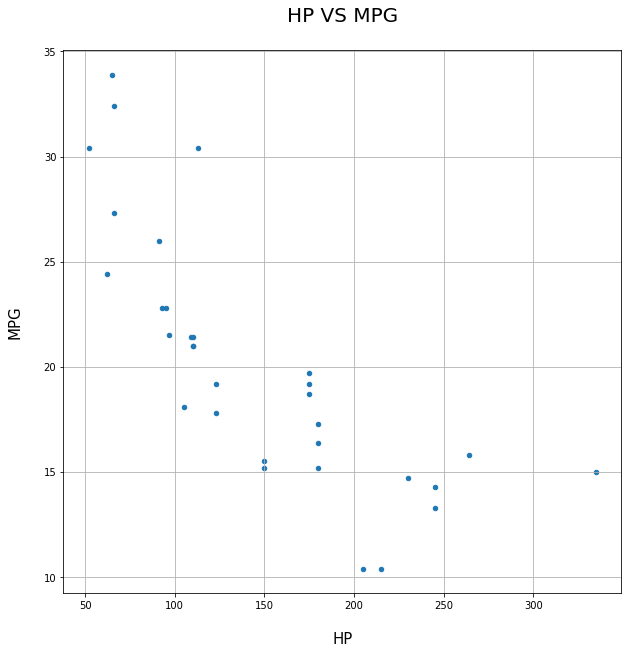

In [11]:
data.plot.scatter(x = 'hp', y = 'mpg',figsize=(10,10))
plt.grid(True)
plt.title("HP VS MPG\n",color="black",fontsize=20)
plt.xlabel("\nHP",fontsize=15,color="black")
plt.ylabel("MPG\n",fontsize=15,color="black")
plt.show()

# Scatter Plot WT Vs MPG

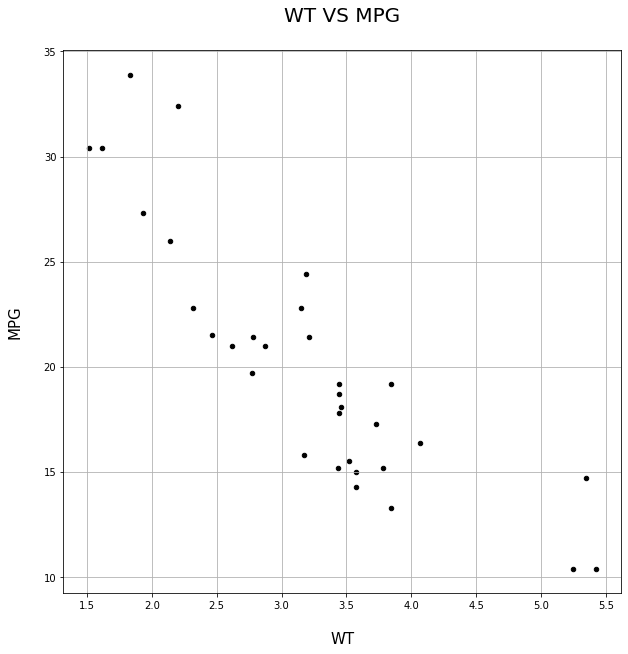

In [12]:
data.plot.scatter(x = 'wt', y = 'mpg',figsize=(10,10),color="black")
plt.grid(True)
plt.title("WT VS MPG\n",color="black",fontsize=20)
plt.xlabel("\nWT",fontsize=15,color="black")
plt.ylabel("MPG\n",fontsize=15,color="black")
plt.show()

# Scatter Plot MPG Vs QSEC

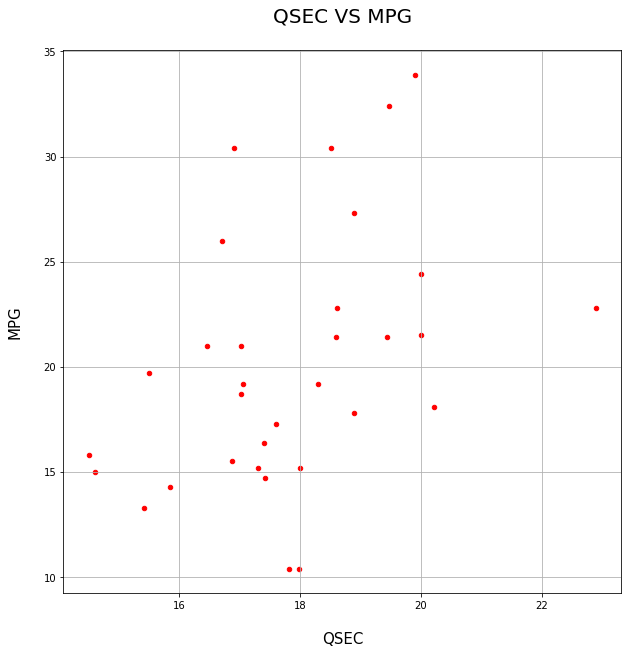

In [13]:
data.plot.scatter(x = 'qsec', y = 'mpg',figsize=(10,10),color="red")
plt.grid(True)
plt.title("QSEC VS MPG\n",color="black",fontsize=20)
plt.xlabel("\nQSEC",fontsize=15,color="black")
plt.ylabel("MPG\n",fontsize=15,color="black")
plt.show()

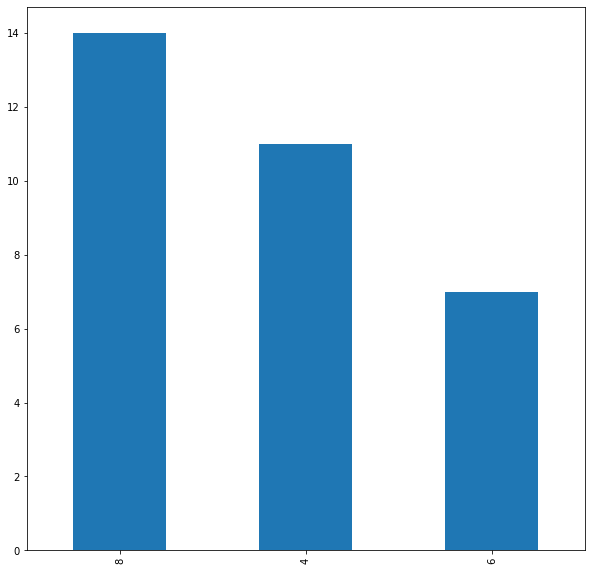

In [14]:
data['cyl'].value_counts().plot.bar(figsize=(10,10));
plt.show()

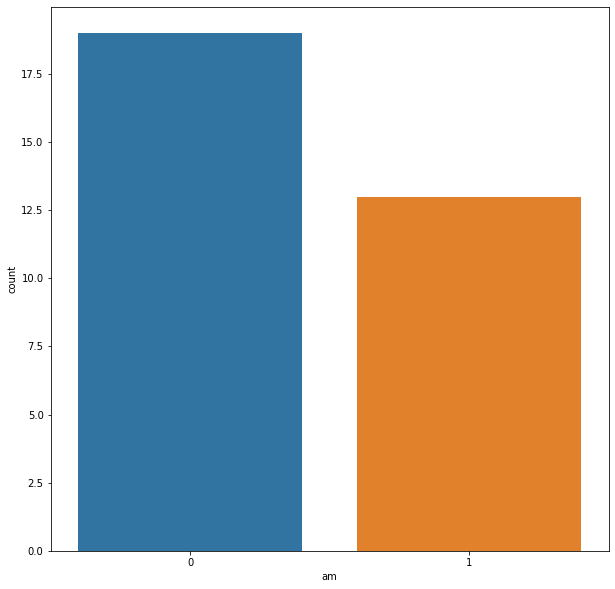

In [15]:
plt.figure(figsize=(10,10))
sns.countplot(data = data, x = 'am')
plt.show()

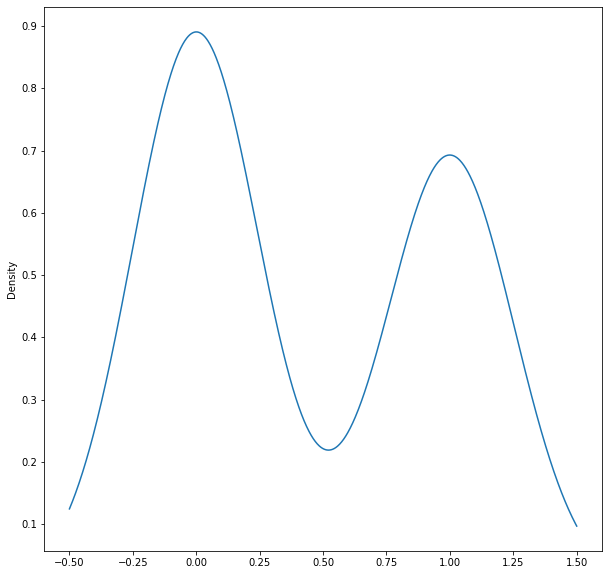

In [16]:
data["vs"].plot( kind = 'density',figsize=(10,10));
plt.show()

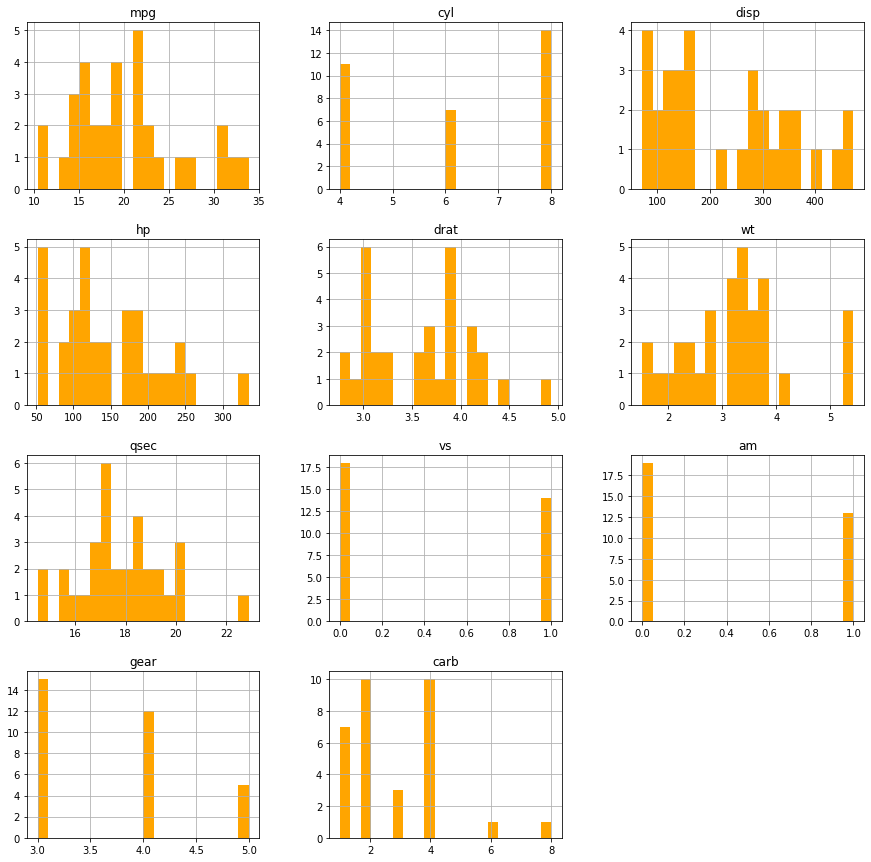

In [17]:
data.hist(bins=20,figsize=(15,15),color="orange")
plt.show()

# Visualize Car Horse Power

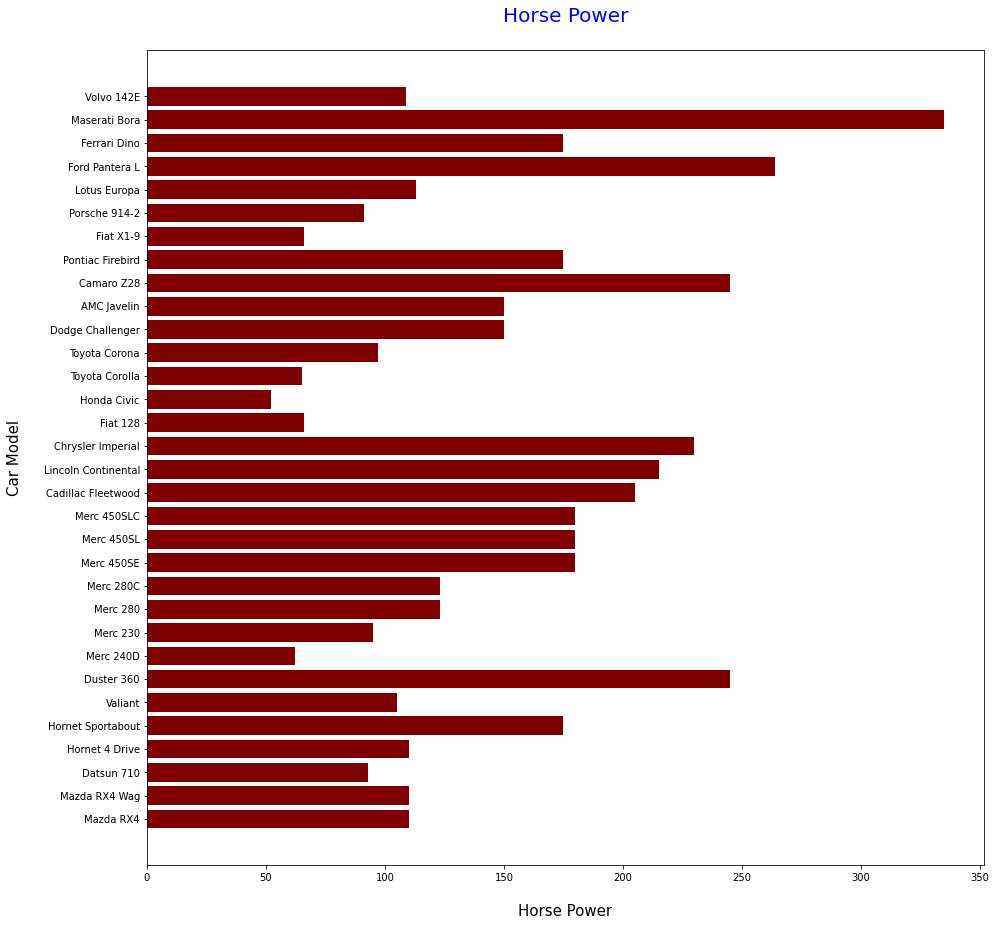

In [18]:

car_model = data["model"].values
car_hp = data["hp"].values
fig = plt.figure(figsize=(15,15))
 
# creating the bar plot
plt.barh(car_model, car_hp, color='maroon')
 
plt.xlabel("\nHorse Power",fontsize=15,color="black")
plt.ylabel("Car Model\n",fontsize=15,color="black")
plt.title("Horse Power\n",fontsize=20,color="blue")
plt.show()

# Visualize Car Gear

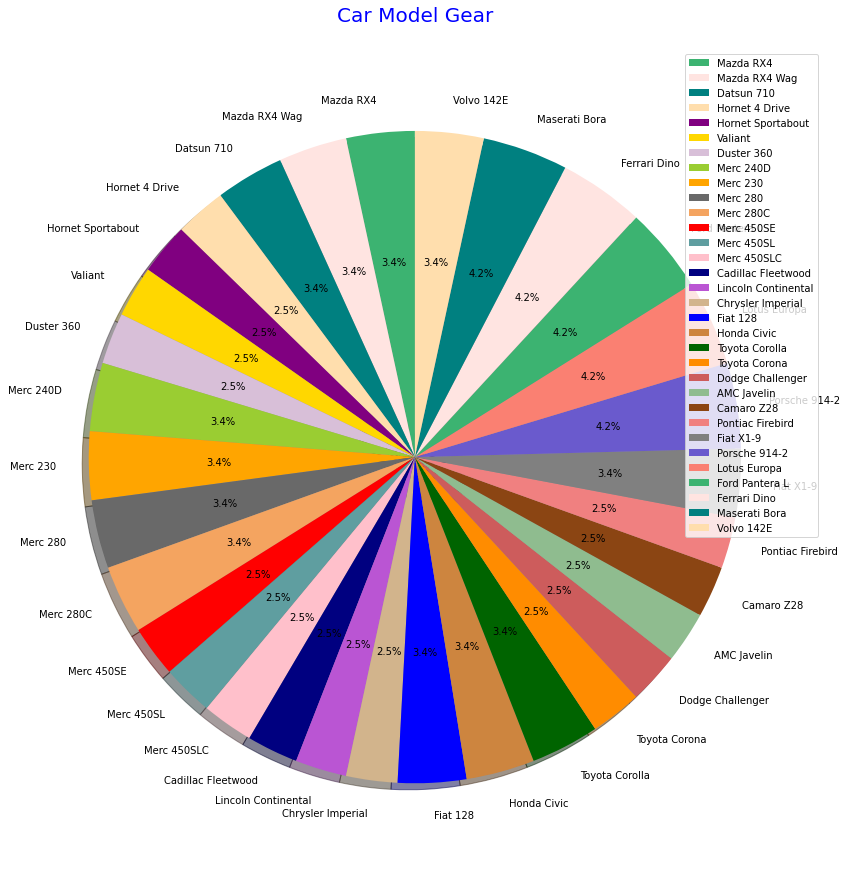

In [19]:
plt.figure(figsize=(15,15))
label_name=data["model"]
y=data["gear"]
color_name=['mediumseagreen','mistyrose','teal','navajowhite','purple','gold','thistle','yellowgreen','orange','dimgray','sandybrown','red','cadetblue','pink','navy','mediumorchid','tan','blue','peru','darkgreen','darkorange','indianred' ,"darkseagreen",'saddlebrown','lightcoral','gray', 'slateblue','salmon']

plt.pie(y, labels =label_name,autopct='%1.1f%%',colors=color_name,shadow=True, startangle=90)
plt.title("Car Model Gear\n",fontsize=20,color="blue")
plt.legend(loc="best")
plt.show() 
               

# Linear Regression Model

In [20]:
model = linear_model.LinearRegression()
model.fit(X=pd.DataFrame(data[['wt',"qsec"]]),y=data['mpg'])

LinearRegression()

In [21]:
y = data["mpg"]

# Check Trained Model Y  Intercept

In [22]:
print(model.intercept_)

19.74622259648119


# Check Trained Model Coefficient

In [23]:
print(model.coef_)

[-5.04798198  0.92919798]


# Check Model Score

In [24]:
print(model.score(X = pd.DataFrame(data[['wt',"qsec"]]), y = data["mpg"]))

0.8264161273395514


# Finding Residuals

In [25]:
residual = model.predict(X = pd.DataFrame(data[['wt',"qsec"]]))
total_residual= y - residual
print("Total Residuals is\n ",total_residual)



Total Residuals is
  0    -0.815109
1    -0.048224
2    -2.527279
3    -0.180569
4     0.503886
5    -2.968588
6    -2.143423
7     2.172880
8    -2.323713
9    -0.185488
10   -2.143006
11    1.031019
12    0.028866
13   -2.190414
14    0.448703
15    1.475724
16    5.748612
17    5.667853
18    1.597522
19    4.925785
20   -4.396199
21   -2.152896
22   -3.281530
23   -1.380913
24    3.020443
25   -0.240219
26    1.538853
27    2.587928
28   -1.417490
29   -0.465881
30   -0.291217
31   -1.595915
Name: mpg, dtype: float64


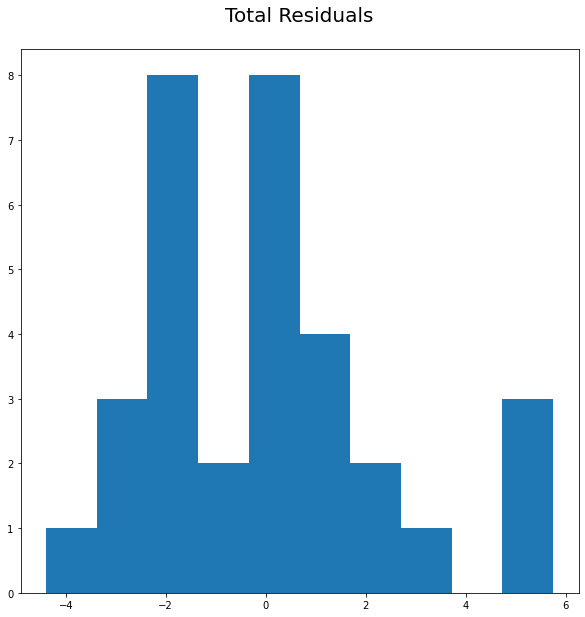

In [26]:
plt.figure(figsize=(10,10))
plt.hist(total_residual, bins= 10)
plt.title("Total Residuals\n",fontsize=20,color="black")
plt.show()

# R_Squared

In [27]:
sum_square_residual = (total_residual**2).sum()
sum_square_total = ((data["mpg"] - data["mpg"].mean())**2).sum()
r_square=1-sum_square_residual/sum_square_total
print(f"R Square is {r_square}")

R Square is 0.8264161273395514


# R2 Score

In [28]:
r2_score = r2_score(data["mpg"],residual)
print(f"R2 Score is {r2_score}")

R2 Score is 0.8264161273395514


# Mean Squared Error

In [29]:
rmse= mean_squared_error(residual, data["mpg"])**0.5

print("Mean Squared Error is ",rmse)

Mean Squared Error is  2.4714850773665433


In [30]:
data.head(5)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


# Check Model With Different Value

In [31]:
model_2= linear_model.LinearRegression()
model_2.fit(X=pd.DataFrame(data[['drat',"gear"]]),y=data['disp'])

LinearRegression()

In [32]:
y=data['disp']

Model Intercept

In [33]:
print(model_2.intercept_)

826.9760727522523


# Check Trained Model Coefficient

In [34]:
print(model_2.coef_)

[-145.98348591  -19.31266894]


# Check Model Score

In [35]:
print(model_2.score(X = pd.DataFrame(data[['drat',"gear"]]), y = data["disp"]))

0.5111520145086733


# Check How Well Fit  Data

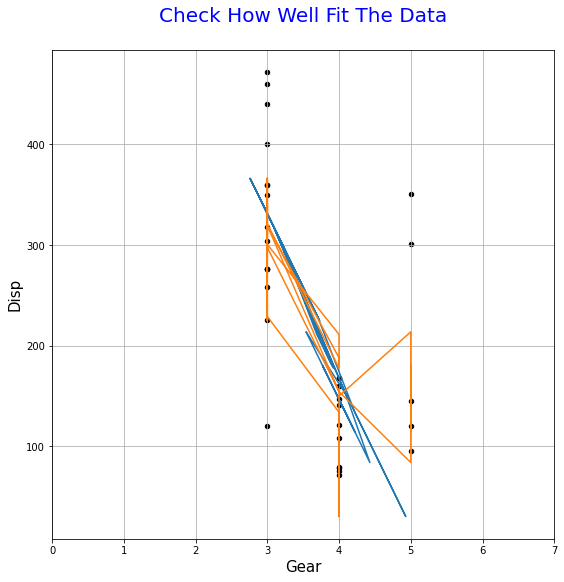

In [36]:

data.plot(kind='scatter', x="gear", y='disp',xlim = (0,7), figsize=(9,9), color='Black')
train_prediction = model_2.predict(X = pd.DataFrame(data[["drat","gear"]]))

plt.plot(data[['drat',"gear"]],train_prediction)
plt.title("Check How Well Fit The Data\n",color="blue",fontsize=20)
plt.grid(True)
plt.xlabel("Gear",fontsize=15,color="black")
plt.ylabel("Disp",fontsize=15,color="black")
plt.show()

# Finding Residual

In [37]:
residual_2 = model_2.predict(X = pd.DataFrame(data[['drat',"gear"]]))
total_residual_2= y - residual_2
print("Total Residuals is\n ",total_residual_2)

Total Residuals is
  0     -20.389802
1     -20.389802
2     -79.688976
3     -61.408929
4      50.809915
5    -141.123645
6      59.568924
7     -64.346334
8     -36.670132
9      -9.870132
10     -9.870132
11    -45.068764
12    -45.068764
13    -45.068764
14    130.693548
15    128.912392
16    142.488594
17    -75.412774
18     45.673189
19    -62.575086
20   -108.799168
21    -48.123645
22     -5.190085
23    125.480337
24     80.591071
25    -75.112774
26     36.594115
27    -84.954986
28    236.637582
29    -56.952509
30     87.368812
31    -28.733270
Name: disp, dtype: float64


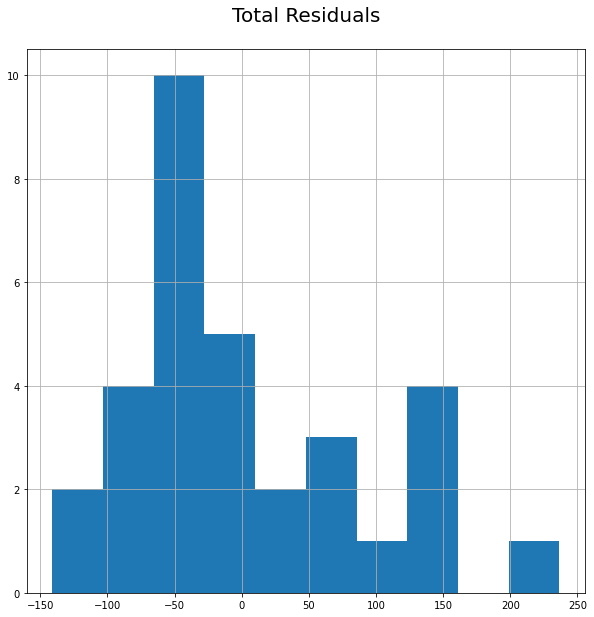

In [38]:
plt.figure(figsize=(10,10))
plt.hist(total_residual_2, bins= 10)
plt.title("Total Residuals\n",fontsize=20,color="black")
plt.grid(True)
plt.show()

# R_Squared

In [39]:
sum_square_residual_2 = (total_residual_2**2).sum()
sum_square_total_2= ((data["disp"] - data["disp"].mean())**2).sum()
r_square_2=1-sum_square_residual_2/sum_square_total_2
print(f"R Square is  {r_square_2}")

R Square is  0.5111520145086733


# Mean Squared Error

In [40]:
rmse_2= mean_squared_error(residual_2, data["disp"])**0.5

print("Mean Squared Error is ",rmse_2)

Mean Squared Error is  85.2903089462296


# Check Different Data

In [41]:
regression_model = linear_model.LinearRegression()

In [42]:
regression_model.fit(X = pd.DataFrame(data["wt"]), y =data["mpg"])
                

LinearRegression()

In [43]:
print(regression_model.intercept_)

37.28512616734204


In [44]:
print(regression_model.coef_)

[-5.34447157]


In [45]:
regression_model.score(X = pd.DataFrame(data["wt"]), y =data["mpg"])

0.7528327936582646

In [46]:
train_prediction = regression_model.predict(X = pd.DataFrame(data["wt"]))

# Actual - prediction = residuals
residuals = data["mpg"] - train_prediction

residuals.describe()

count    3.200000e+01
mean    -8.215650e-15
std      2.996352e+00
min     -4.543151e+00
25%     -2.364709e+00
50%     -1.251956e-01
75%      1.409561e+00
max      6.872711e+00
Name: mpg, dtype: float64

In [47]:
SSResiduals = (residuals**2).sum()

SSTotal = ((data["mpg"] - data["mpg"].mean())**2).sum()

# R-squared
1 - (SSResiduals/SSTotal)

0.7528327936582646

# Check How Well Fit  Data

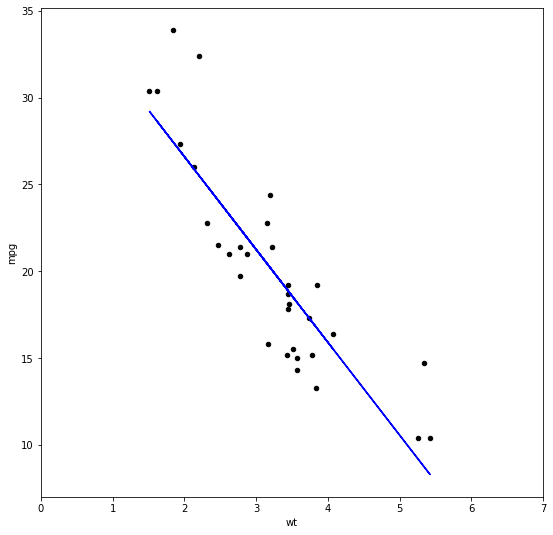

In [48]:

data.plot(kind="scatter",x="wt",y="mpg",figsize=(9,9),color="black",xlim = (0,7))

# Plot regression line
plt.plot(data["wt"],train_prediction, color="blue")
       

In [49]:
rmse = mean_squared_error(train_prediction, data["mpg"])**0.5

rmse

2.949162685955028